<a href="https://colab.research.google.com/github/vamsireddi/Machine-Learning-/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Features for predicting Output

In [ ]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

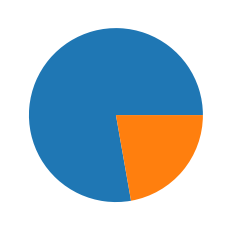

In [ ]:
Split=np.array([70,20])
plt.pie(Split)
plt.show() 

# **Creating Desicion Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
column=['Age', 'EstimatedSalaray']

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix 1:',confusionmatrix )

Confusion Matrix 1: [[70  9]
 [ 4 37]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


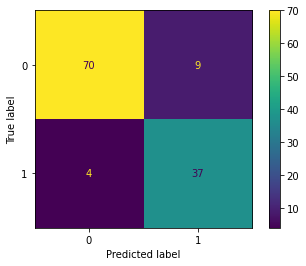

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test)

# **Accuracy**

In [ ]:
A=accuracy_score(y_test, y_pred)
print('Accuracy of the model:',A)

Accuracy of the model: 0.8916666666666667


# **Predicted Values**

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
216,0,0
259,1,1
49,0,0
238,0,1


#**Decision Tree** 

[Text(0.4875, 0.9615384615384616, 'Age <= 43.5\nentropy = 0.946\nsamples = 280\nvalue = [178, 102]\nclass = 0'),
 Text(0.2571428571428571, 0.8846153846153846, 'EstimatedSalaray <= 90500.0\nentropy = 0.676\nsamples = 202\nvalue = [166, 36]\nclass = 0'),
 Text(0.14285714285714285, 0.8076923076923077, 'Age <= 36.5\nentropy = 0.224\nsamples = 166\nvalue = [160, 6]\nclass = 0'),
 Text(0.11428571428571428, 0.7307692307692307, 'entropy = 0.0\nsamples = 109\nvalue = [109, 0]\nclass = 0'),
 Text(0.17142857142857143, 0.7307692307692307, 'EstimatedSalaray <= 83500.0\nentropy = 0.485\nsamples = 57\nvalue = [51, 6]\nclass = 0'),
 Text(0.14285714285714285, 0.6538461538461539, 'EstimatedSalaray <= 67500.0\nentropy = 0.376\nsamples = 55\nvalue = [51, 4]\nclass = 0'),
 Text(0.11428571428571428, 0.5769230769230769, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = 0'),
 Text(0.17142857142857143, 0.5769230769230769, 'EstimatedSalaray <= 70500.0\nentropy = 0.592\nsamples = 28\nvalue = [24, 4]\nclass 

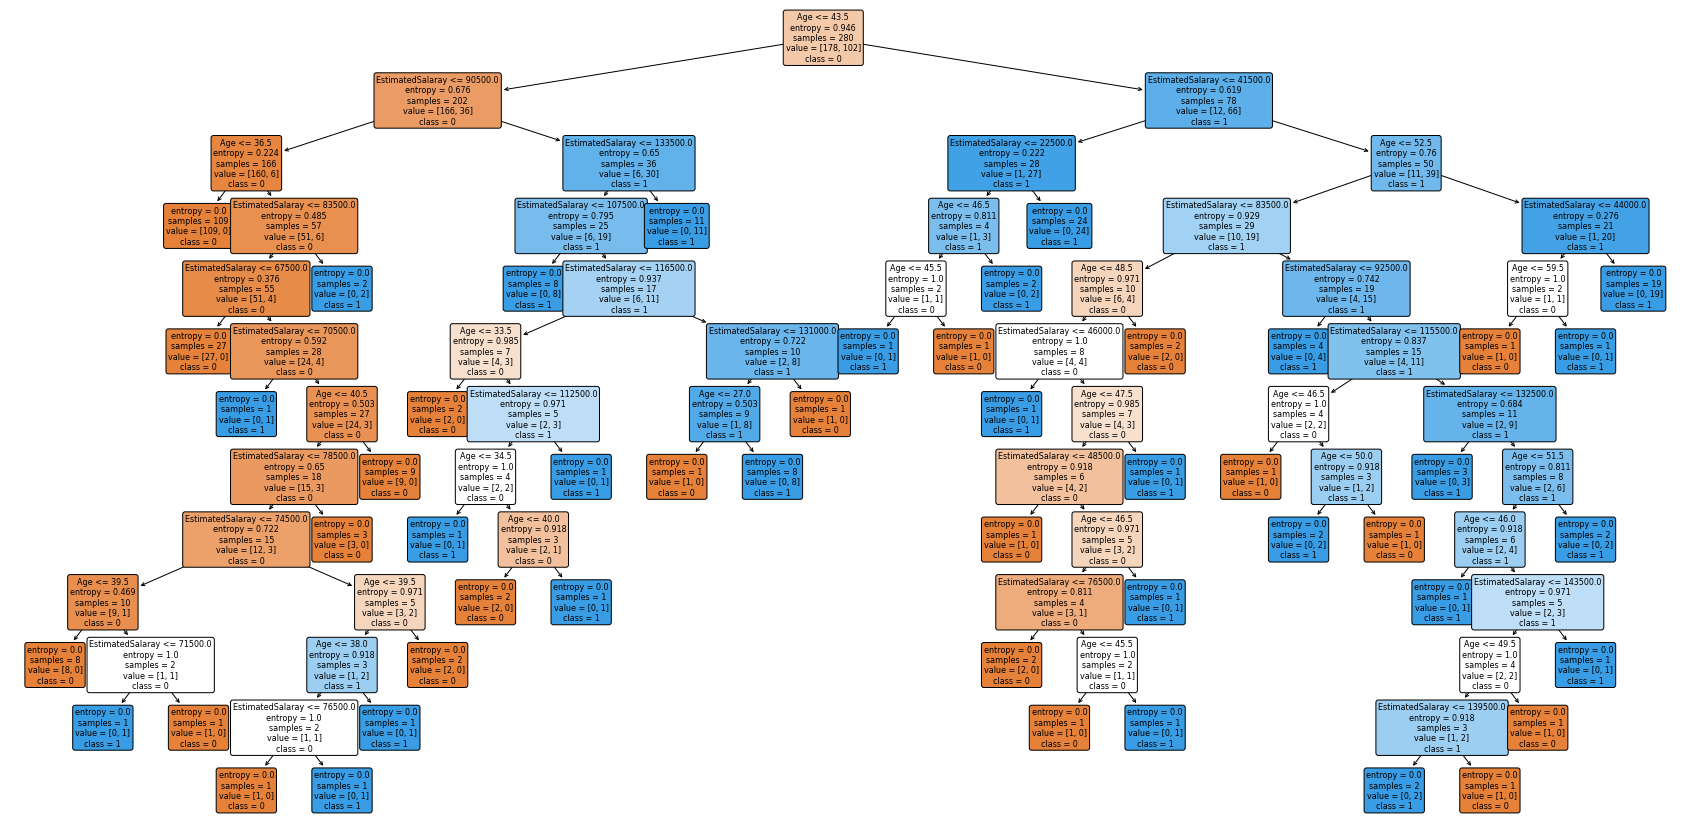

In [ ]:
plt.figure(figsize=(30,15))
tree.plot_tree(classifier,class_names=['0','1'],feature_names=column, filled=True,rounded=True,fontsize=8)

##  Predicting  for Random Values

In [ ]:
Status=classifier.predict([[39,	34000]])
if Status==0:
  print('Not Purchased')
else:
  print('Purchased')

Not Purchased


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
Status=classifier.predict([[69,	199000]])
if Status==0:
  print('Not Purchased')
else:
  print('Purchased')

Purchased


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
